<a href="https://colab.research.google.com/github/Dexne/Pattern_Recognition/blob/main/05_regresion_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reconocimiento de patrones**

**Regresión polinomial**

In [1]:
# Páquetes básicos
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# Páquetes de sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Creamos datos de manera sintética

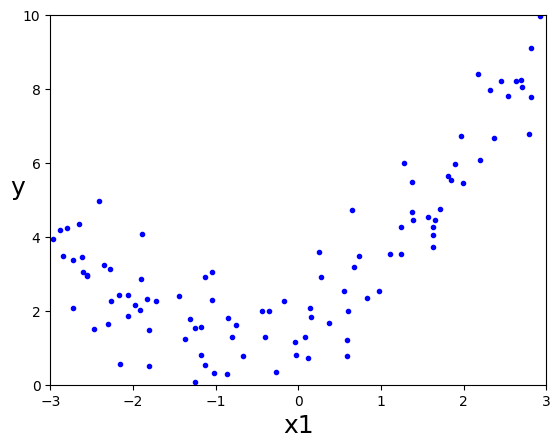

In [3]:
# Semilla del generador pseudoaleatorio
np.random.seed(42)

# Número de muestras
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Dibujar datos
plt.plot(X, y, "b.")
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Las características polinómicas (también llamado expanción polinomial) es un pretratamiento que podemos hacerle a los datos. Se generan nuevos datos a partir de combinaciones polinomiales de los datos de entrada. Por ejemplo, suponga que tenemos una entrada (x1,x2)
 podemos expandirlo con las caracteristicas de grado 2 a (1,x1,x2,x^2 _1, x^2 _2, x1,x2)
.
En el sigueiten código hacemos la expansión de grado 3 de los datos:

In [4]:
# Instanciar objeto (no incluimos el bías que sería el termino independiente)
poly_features = PolynomialFeatures(degree=3, include_bias=False)

# Crear nuevos datos
X_poly = poly_features.fit_transform(X)

# Comaperemos los datos
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654 -0.42654845]


Ahora bien siempre antes de introducir los datos a cualquier técnica de Aprendizaje Automático, se recomienda escalarlos (algunas técnicas es necesario y en otras no, ante la duda siempre noramalizar ya que no suele afectar a las técnicas que no lo necesitan)

In [5]:
# Intanciamos escalador
scaler = StandardScaler()

# Entrenar y escalar
X_poly_scaled = scaler.fit_transform(X_poly)

Al entrenar un regresor lineal sobre estas nuevas entradas en realidad estámos haciendo la regresión sobre los coheficientes de un polinomio

In [6]:
# Intanciar regresor
lin_reg = LinearRegression()

# Entrenar regresor
lin_reg.fit(X_poly_scaled, y)

LinearRegression()

Dibujemos la linea de regresión

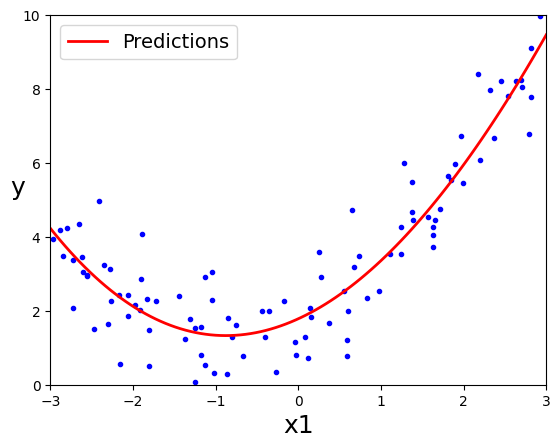

In [8]:
# Creamos una serie de datos de -3 a 3 interpolados linealmente
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

# Expandemos los puntos con caracteristicas polinomicas
X_new_poly = poly_features.transform(X_new)

# Normalizamos los datos
X_new_poly_scaled = scaler.transform(X_new_poly)

# Hacemos la predicción de los datos
y_new = lin_reg.predict(X_new_poly_scaled)

# Dibujamos los datos originales
plt.plot(X, y, "b.")

# Dibujamos la linea de regresión
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

# Agregamos etiquetas
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [9]:
print(lin_reg.predict(scaler.transform(poly_features.transform([[1.5]]))))

[[4.53230346]]


Para evitar lo anterior vamos a encapsular los modelos con la herramienta Pipeline

In [10]:
# Declare el grado de la regresión polinomial
degree = 3

# Instanciemos los submodelos
polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

# Crear modelo integrado por los diferentes submodelos
model = Pipeline([("poly_features", polybig_features),
                  ("std_scaler", std_scaler),
                  ("lin_reg", lin_reg)])

Ahora podemos simplemente usar este modelo para entrenar y predecir.

r2-score:  0.8534041276189528


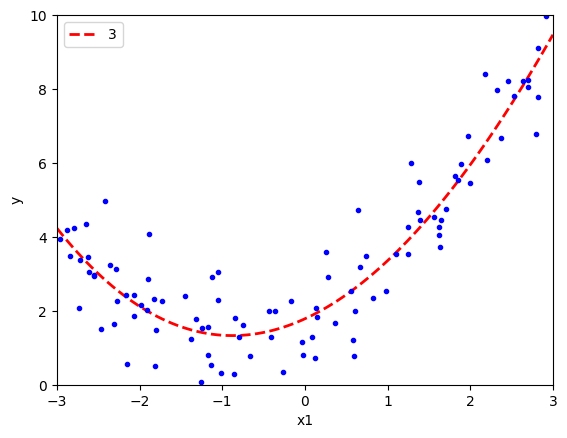

In [12]:
# Entrenar modelo
model.fit(X, y)

# Calculamos el desempeño del modelo (r2_score)
print('r2-score: ', model.score(X, y))

# Dibujar salida
y_new = model.predict(X_new)
plt.plot(X_new, y_new, 'r--', label=str(degree), linewidth=2)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("x1")
plt.ylabel("y")
plt.axis([-3, 3, 0, 10])
plt.show()

**Demostrando generalización**

El objetivo de entrenar un modelo de aprendizaje automático es aprender de los datos los patrones de importancia, ignorando el ruido que los datos puedan contener. Cuando el modelo es muy sencillo (grado=1) no le es posible aprender la tendencia de los datos (decimos que se subentrena). Por otra parte, cuando el modelo es muy complejo (grado=300) aprendemeos incluso el ruido de los datos (decimos que está sobreentrenado). Cuando la complejidad del modelo es acorde al patrón que tenemos que reconocer decimos que generaliza bien.

Como se mostró en el experimento anterior, no podemos saber si un modelo está subentrenado o sobreentrenado con solo una medida de desempeño por lo que necesitamos al menos 2. Existen varios esquemas para demostrar generalización, el más clásico consiste en particionar de manera aleatoria los datos dejando un porcentaje mayoritario para entrenar y el menor para probar. Comparando los desempeños con datos de entrenamiento y prueba podemos diagnosticar el aprendizaje del modelo.

A continuación particionamos los datos:

In [13]:
# Particionamos los datos 75% para entrenar y 25% para probar, estos porcentajes dependen de la cantidad de datos
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

# Imprimimos los tamaños de cada conjunto
print("Entrada original: ", X.shape)
print("Entrada entrenamiento: ", xtrain.shape)
print("Entrada prueba: ", xtest.shape)

print("Salida original: ", y.shape)
print("Salida entrenamiento: ", ytrain.shape)
print("Salida prueba: ", ytest.shape)

Entrada original:  (100, 1)
Entrada entrenamiento:  (75, 1)
Entrada prueba:  (25, 1)
Salida original:  (100, 1)
Salida entrenamiento:  (75, 1)
Salida prueba:  (25, 1)


Train:  0.9403234245361453
Test:  -3.537074611547774e+22


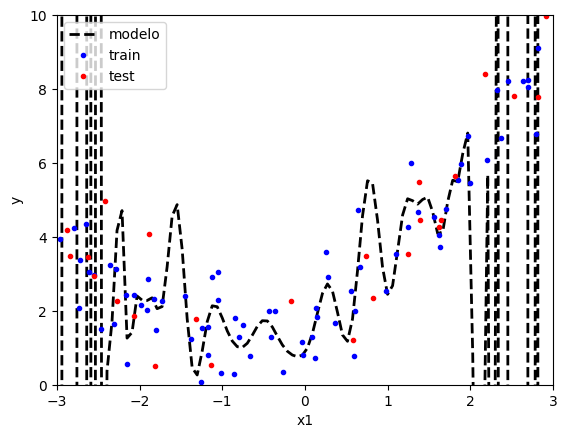

In [16]:
# Declare el grado de la regresión polinomial
degree = 300

# Instanciemos los submodelos
polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

# Crear modelo integrado por los diferentes submodelos
model = Pipeline([("poly_features", polybig_features),
                  ("std_scaler", std_scaler),
                  ("lin_reg", lin_reg)])

# Entrenar modelo solo con los datos de entrenamiento
model.fit(xtrain, ytrain)

# Calculamos el desempeño del modelo (r2_score)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

# Dibujar salida
y_new = model.predict(X_new)
plt.plot(X_new, y_new, 'k--', label='modelo', linewidth=2)
plt.plot(xtrain, ytrain, "b.", label='train', linewidth=3)
plt.plot(xtest, ytest, "r.",label='test', linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("x1")
plt.ylabel("y")
plt.axis([-3, 3, 0, 10])
plt.show()

**Conclusión**

Para medir un problema de aprendizaje es necesario particionar en un conjunto de entrenamiento y prueba. El modelo se entrena solo con el conjunto de entrenamiento pero se calcula el desempeño para ambos conjuntos. Se puede diagnosticar el modelo de acuerdo a los siguiente

- Train-score alto, Test-score bajo: Sobreentrenamiento
- Train-score bajo, Test-score bajo: Subentrenamiento
- Train-score alto, Test-score alto: Bien generalizado

Sacando todas las combinaciones, también podriamos considerar el caso en que el Train-score sea bajo y el Test-score es alto, este caso debería ser imposible en caso de encontrarse solo indicaría que el conjunto de entrenamiento y prueba tienes distribuciones diferentes.